<h1 style="font-size:42px; text-align:center;">4. Model Training</h1>
<hr>

In [2]:
import numpy as np

import pandas as pd
pd.set_option('display.max_columns', 100)
pd.set_option('display.float_format', lambda x: '%.3f' % x)

from matplotlib import pyplot as plt
%matplotlib inline 

import seaborn as sns

import sklearn

In [3]:
from sklearn.linear_model import ElasticNet, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

In [4]:
df = pd.read_csv('final_features.csv')
print(df.shape)
df.head()

(1863, 40)


,tx_price,beds,baths,sqft,lot_size,basement,restaurants,groceries,nightlife,cafes,shopping,arts_entertainment,beauty_spas,active_life,median_age,married,college_grad,property_tax,insurance,median_school,num_schools,two_and_two,during_recession,property_age,school_score,property_type_Apartment / Condo / Townhouse,property_type_Single-Family,exterior_walls_Brick,exterior_walls_Brick veneer,exterior_walls_Combination,exterior_walls_Metal,exterior_walls_Missing,exterior_walls_Other,exterior_walls_Siding (Alum/Vinyl),exterior_walls_Wood,roof_Asphalt,roof_Composition Shingle,roof_Missing,roof_Other,roof_Shake Shingle
0,295850,1,1,584,0,0.000,107,9,30,19,89,6,47,58,33.000,65.000,84.000,234.000,81.000,9.000,3.000,0,1,0,27.000,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0
1,216500,1,1,612,0,1.000,105,15,6,13,87,2,26,14,39.000,73.000,69.000,169.000,51.000,3.000,3.000,0,0,41,9.000,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0
2,279900,1,1,615,0,0.000,183,13,31,30,101,10,74,62,28.000,15.000,86.000,216.000,74.000,8.000,3.000,0,1,49,24.000,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0
3,379900,1,1,618,33541,0.000,198,9,38,25,127,11,72,83,36.000,25.000,91.000,265.000,92.000,9.000,3.000,0,0,5,27.000,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0
4,340000,1,1,634,0,0.000,149,7,22,20,83,10,50,73,37.000,20.000,75.000,88.000,30.000,9.000,3.000,0,0,10,27.000,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0


## Split data into train and test sets

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
# Target variable
y = df.tx_price

# Input features
X = df.drop('tx_price', axis = 1)

Retaining 20% of the data for testing by using parameter <code style="color:steelblue">test_size=<span style="color:crimson">0.2</span></code> in <code style="color:steelblue">train_test_split</code>

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1234) #20% test and seed set to 1234

In [8]:
print( len(X_train), len(X_test), len(y_train), len(y_test) )

print('\t\tTrain \tTest')
print('Num of X in:\t{}\t{}'.format(len(X_train), len(X_test)))
print('Num of Y in:\t{}\t{}'.format(len(y_train), len(y_test)))

1490 373 1490 373
		Train 	Test
Num of X in:	1490	373
Num of Y in:	1490	373


## Building model pipelines

In [12]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

In [14]:
pipelines = {
    'lasso': make_pipeline(StandardScaler(), Lasso(random_state = 123)),
    'ridge': make_pipeline(StandardScaler(), Ridge(random_state = 123)),
    'enet' : make_pipeline(StandardScaler(), ElasticNet(random_state = 123)),
    'rf' : make_pipeline(StandardScaler(), RandomForestRegressor(random_state = 123)),
    'gb' : make_pipeline(StandardScaler(), GradientBoostingRegressor(random_state = 123))
}

## Hyperparameters to tune

In [17]:
# List tuneable hyperparameters of our Lasso pipeline
pipelines['lasso'].get_params()

{'memory': None,
 'steps': [('standardscaler',
   StandardScaler(copy=True, with_mean=True, with_std=True)),
  ('lasso', Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=123,
      selection='cyclic', tol=0.0001, warm_start=False))],
 'standardscaler': StandardScaler(copy=True, with_mean=True, with_std=True),
 'lasso': Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
    normalize=False, positive=False, precompute=False, random_state=123,
    selection='cyclic', tol=0.0001, warm_start=False),
 'standardscaler__copy': True,
 'standardscaler__with_mean': True,
 'standardscaler__with_std': True,
 'lasso__alpha': 1.0,
 'lasso__copy_X': True,
 'lasso__fit_intercept': True,
 'lasso__max_iter': 1000,
 'lasso__normalize': False,
 'lasso__positive': False,
 'lasso__precompute': False,
 'lasso__random_state': 123,
 'lasso__selection': 'cyclic',
 'lasso__tol': 0.0001,
 'lasso__warm_start': False}

In [18]:
# Lasso hyperparameters
lasso_hyperparameters = { 
    'lasso__alpha' : [0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10] 
}

# Ridge hyperparameters
ridge_hyperparameters = { 
    'ridge__alpha': [0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10]  
}

# ElasticNet hyperparameters
enet_hyperparameters = { 
    'elasticnet__alpha': [0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10],                        
    'elasticnet__l1_ratio' : [0.1, 0.3, 0.5, 0.7, 0.9]  
}

# Random forest hyperparameters
rf_hyperparameters = {
    'randomforestregressor__n_estimators': [100, 200],
    'randomforestregressor__max_features': ['auto', 'sqrt', 0.33]
}

# Boosted tree hyperparameters
gb_hyperparameters = {
    'gradientboostingregressor__n_estimators': [100, 200],
    'gradientboostingregressor__learning_rate': [0.05, 0.1, 0.2],
    'gradientboostingregressor__max_depth': [1, 3, 5]
}

In [22]:
hyperparameters = {
    'lasso': lasso_hyperparameters,
    'ridge': ridge_hyperparameters,
    'enet': enet_hyperparameters,
    'rf': rf_hyperparameters,
    'gb': gb_hyperparameters
}

## Fit and tune models using cross-validation (Train the models)

In [24]:
from sklearn.model_selection import GridSearchCV

In [27]:
fitted_models = {}

for name, pipeline in pipelines.items():
    model = GridSearchCV(pipeline, hyperparameters[name], cv=10, n_jobs=-1)
    #cv is number of K-folds, and n_jobs is no of cores to use for processing
    
    model.fit(X_train, y_train)
    fitted_models[name] = model
    
    print(name, 'has been fitted.')

lasso has been fitted.
ridge has been fitted.
enet has been fitted.
rf has been fitted.
gb has been fitted.


## Evaluate models

In [30]:
# Display best_score_ for each model
for name, model in fitted_models.items():
    print('{}: {}'.format(name, model.best_score_))

lasso: 0.3086275139639125
ridge: 0.31661115859856515
enet: 0.3428746288316883
rf: 0.4805826006661585
gb: 0.48762869203487064


In [31]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error

In [35]:
for name, model in fitted_models.items():
    print('{}\n---------------'.format(name))
    
    yhat = model.predict(X_test)
    
    
    print('R^2: {}\nMAE: {}\n'.format(r2_score(y_test, yhat), mean_absolute_error(y_test, yhat)) )
    

lasso
---------------
R^2: 0.4088862469438376
MAE: 85035.54249916306

ridge
---------------
R^2: 0.4093396476329718
MAE: 84978.03564808935

enet
---------------
R^2: 0.4052451374765593
MAE: 86298.63724146318

rf
---------------
R^2: 0.5688239491532692
MAE: 68303.58994638069

gb
---------------
R^2: 0.5398828613026652
MAE: 70612.67562783729



### Model Training Conclusion:
* Model with highest $R^2$ on the test set is:
> Random forest

* Model with lowest mean absolute error is:
> Random forest

* Hence the best model is:
> Random forest

### Let's check predicted and actual values on training set

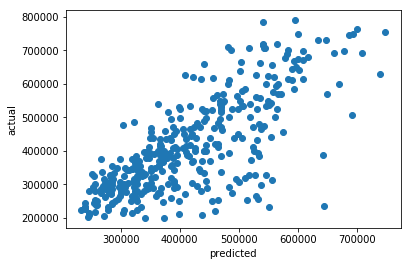

In [36]:
rf_pred = fitted_models['rf'].predict(X_test)
plt.scatter(rf_pred, y_test)
plt.xlabel('predicted')
plt.ylabel('actual')
plt.show()

### Scatter Plot Conclusion:
* We can see most of the ***points are scattered around 45 degree diagonal indicating a good model preformance on test set***.

In [37]:
type(fitted_models['rf'])

sklearn.model_selection._search.GridSearchCV

In [39]:
fitted_models['rf'].best_estimator_

Pipeline(memory=None,
     steps=[('standardscaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('randomforestregressor', RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=1,
           oob_score=False, random_state=123, verbose=0, warm_start=False))])

**Best values of hyperparameters for RandomForest are:**
* <code style="color:steelblue">n_estimators: <span style="color:crimson">200</span></code>
* <code style="color:steelblue">max_features : <span style="color:crimson">'auto'</span></code>

In [96]:
X_test.head()

,beds,baths,sqft,lot_size,basement,restaurants,groceries,nightlife,cafes,shopping,arts_entertainment,beauty_spas,active_life,median_age,married,college_grad,property_tax,insurance,median_school,num_schools,two_and_two,during_recession,property_age,school_score,property_type_Apartment / Condo / Townhouse,property_type_Single-Family,exterior_walls_Brick,exterior_walls_Brick veneer,exterior_walls_Combination,exterior_walls_Metal,exterior_walls_Missing,exterior_walls_Other,exterior_walls_Siding (Alum/Vinyl),exterior_walls_Wood,roof_Asphalt,roof_Composition Shingle,roof_Missing,roof_Other,roof_Shake Shingle
266,2,2,1200,2744,1.000,141,6,26,26,244,25,139,50,38.000,29.000,90.000,503.000,167.000,4.000,3.000,1,1,73,12.000,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0
790,3,3,1716,1650,1.000,47,7,5,4,43,4,17,10,35.000,49.000,84.000,418.000,127.000,6.500,2.000,0,0,12,13.000,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0
222,2,2,1100,0,1.000,44,16,1,4,56,3,21,6,37.000,62.000,55.000,204.000,62.000,4.000,3.000,1,0,10,12.000,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0
220,2,2,1098,1314,1.000,90,8,6,9,48,5,47,16,33.000,57.000,74.000,263.000,80.000,8.000,3.000,1,0,18,24.000,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0
920,3,4,1584,1794,1.000,33,5,3,5,23,1,23,12,34.000,36.000,86.000,373.000,113.000,8.000,3.000,0,0,29,24.000,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0


In [110]:
observation = pd.DataFrame(X_test.iloc[4,:])
observation = observation.transpose()

In [111]:
p = fitted_models['rf'].predict(observation)
p

array([401221.41])

In [94]:
y_test.head()

266    550000
790    419900
222    243000
220    342500
920    498000
Name: tx_price, dtype: int64

In [194]:
import pickle

In [195]:
with open('final_model.pkl', 'wb') as f:
    pickle.dump(fitted_models['rf'].best_estimator_, f)

<h2 style="text-align: center">And this is how we come to an end!</h2>
<h3 style="text-align: center">Thank you! for checking out my project</h3>